In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [66]:
with open("results/INSAR_20200909_PSDS_v3/PATCH_1/pscands.1.ll", "r") as f:
    ll = np.loadtxt(f)


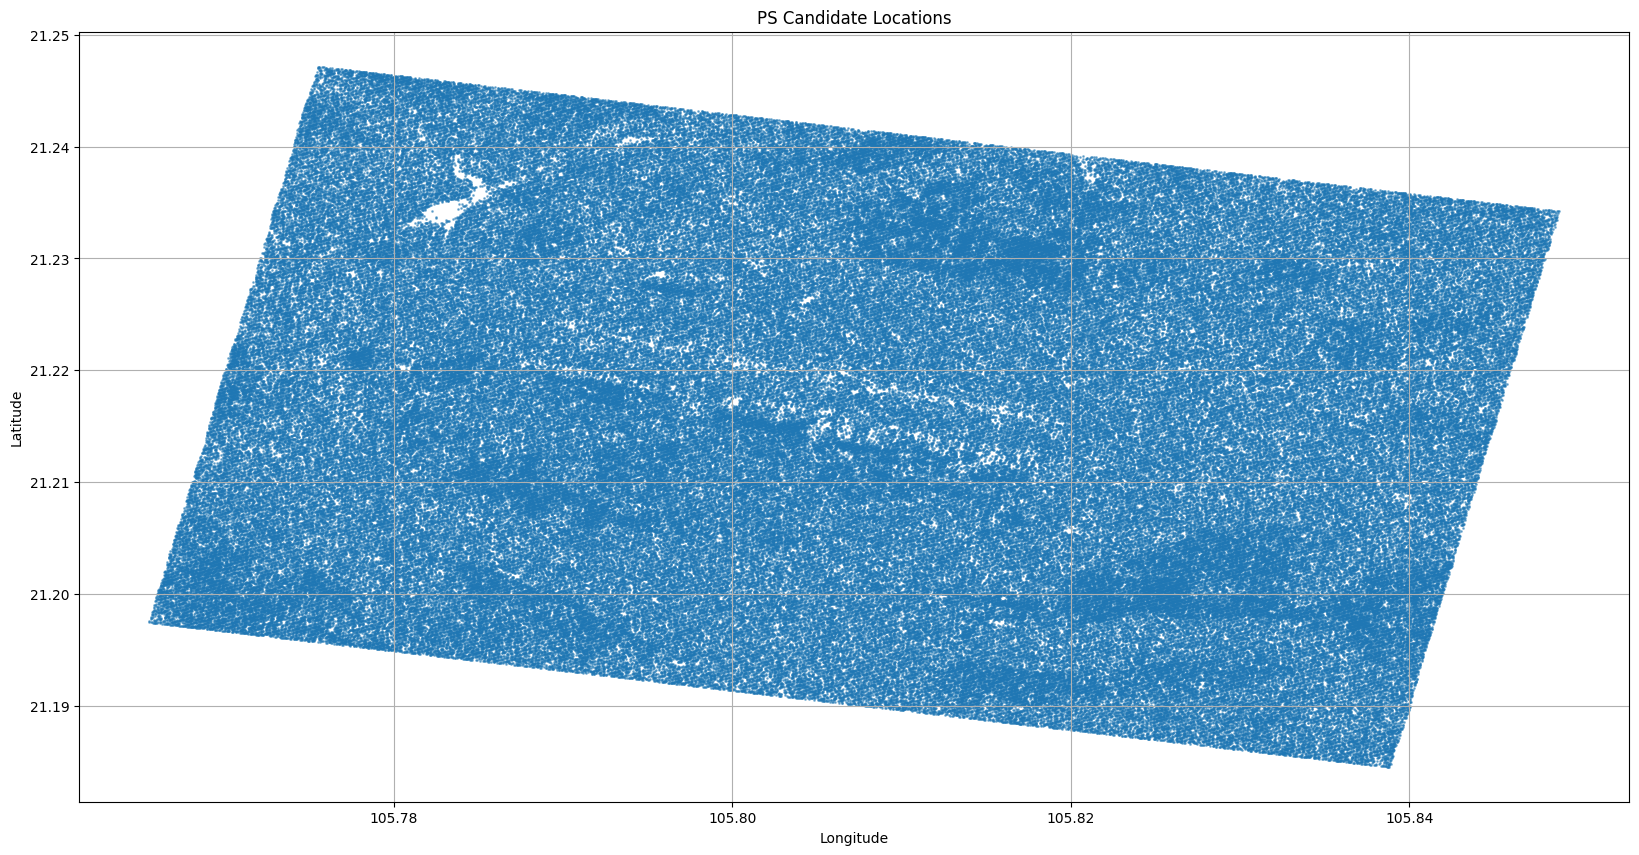

In [69]:
# Plot the lon/lat points
plt.figure(figsize=(20,10))
plt.scatter(ll[:,0], ll[:,1], s=1, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('PS Candidate Locations')
plt.grid(True)
plt.show()

# Split into lon/lat arrays for later use
lon = ll[:,0] 
lat = ll[:,1]


In [70]:
pm1 = sio.loadmat("results/INSAR_20200909_PSDS_v3/PATCH_1/pm1.mat")
ps2 = sio.loadmat("results/INSAR_20200909_PSDS_v3/PATCH_1/ps2.mat")
ij = ps2['ps']['ij'][0][0].astype(int)
lonlat = ps2['ps']['lonlat'][0][0]
selected_ph = pm1['ph_patch'][ij[:, 0], :]


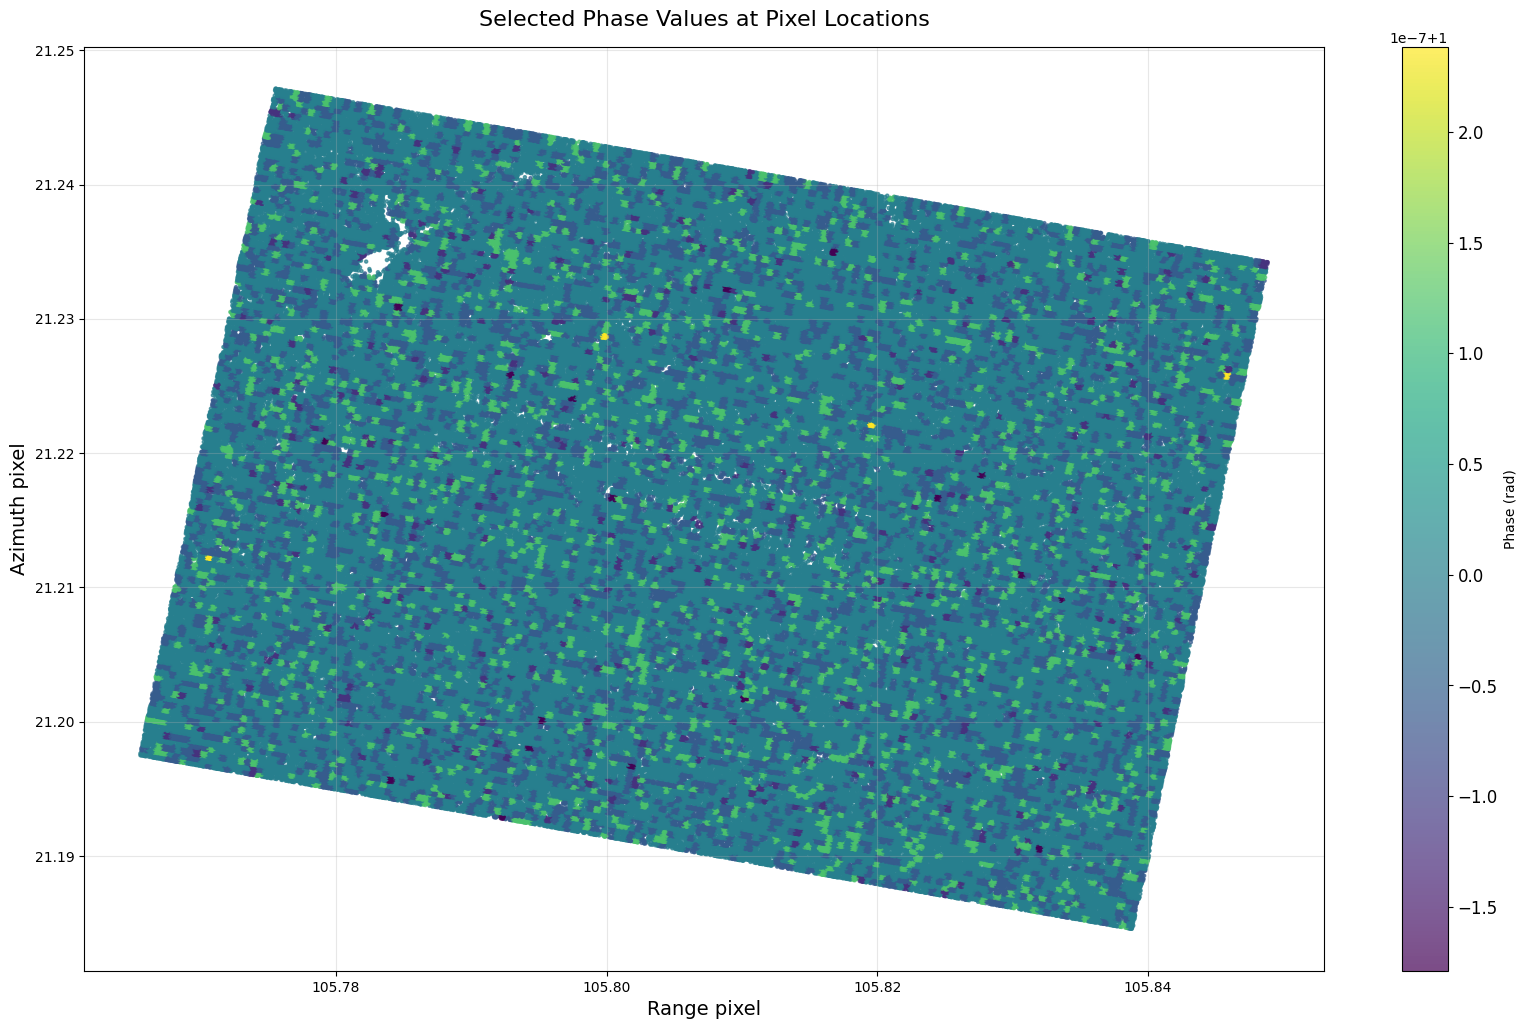

In [77]:
# Plot selected phase values at their pixel locations
plt.figure(figsize=(20,12))

# Use viridis colormap with increased point size and alpha
plt.scatter(lonlat[:, 0], lonlat[:, 1], 
           c=np.angle(selected_ph[:,0]),
           cmap='viridis', 
           s=1,  # Increased marker size
           alpha=0.7)  # Increased opacity

# Add a more visible colorbar
cbar = plt.colorbar(label='Phase (rad)')
cbar.ax.tick_params(labelsize=12)

# Enhance axis labels and title
plt.xlabel('Range pixel', fontsize=14)
plt.ylabel('Azimuth pixel', fontsize=14)
plt.title('Selected Phase Values at Pixel Locations', fontsize=16, pad=15)

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.show()



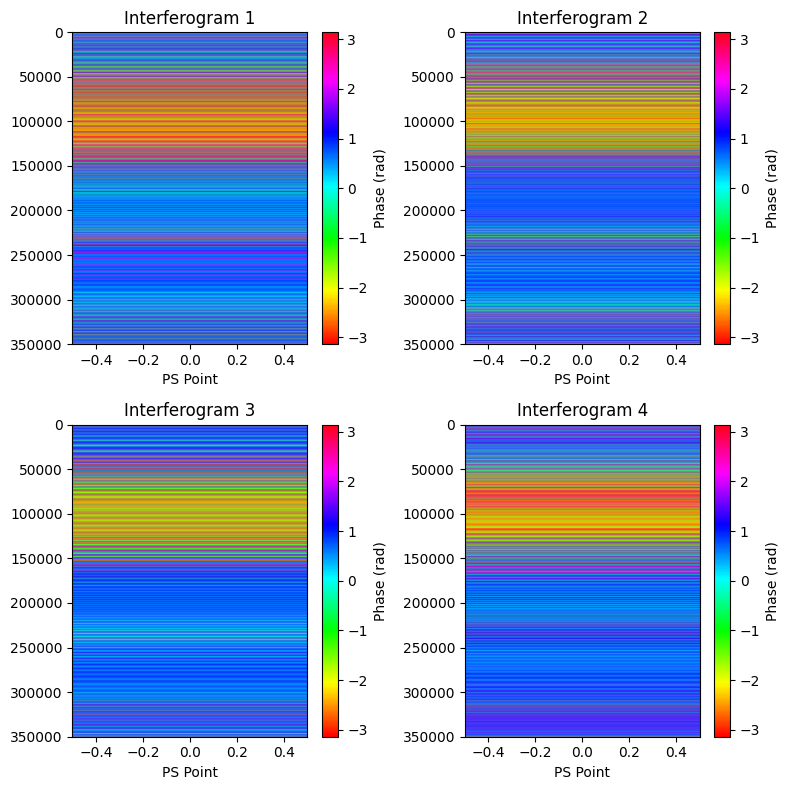

In [4]:
# Get number of interferograms
n_ifg = pm1['ph_patch'].shape[1]

# Create subplot grid
n_rows = int(np.ceil(np.sqrt(n_ifg)))
n_cols = int(np.ceil(n_ifg / n_rows))

plt.figure(figsize=(4*n_cols, 4*n_rows))

# Plot phase for each interferogram
for i in range(n_ifg):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(np.angle(pm1['ph_patch'][:,i]).reshape(-1,1), aspect='auto', cmap='hsv')
    plt.colorbar(label='Phase (rad)')
    plt.title(f'Interferogram {i+1}')
    plt.xlabel('PS Point')

plt.tight_layout()
plt.show()
